#  Sampling Plans

This section provides implementation for the concepts covered in the class for sampling plans. Following topics are covered in this section:

1. Full Factorial Sampling
2. Latin Hypercube Sampling

> **_NOTE:_** You need to install [smt](https://smt.readthedocs.io/en/latest/) which is a python-based surrogate modeling toolbox. It provides various surrogate modeling techniques, along with different sampling plans. Activate the environment you created for this class in anaconda prompt and install smt using `pip install smt`.

Below block of code imports required packages:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import FullFactorial, LHS

## Full Factorial Sampling

First, we will look at full factorial sampling. You can read about how to use `smt` for generating full-factorial samples in the [documentation](https://smt.readthedocs.io/en/latest/_src_docs/sampling_methods/full_factorial.html). Below block of code generates full-factorial samples for *two* dimensional design space and plots it. Read comments for more details.

> __NOTE:__ When generating full-factorial samples, the number of samples grows exponentially with the number of input parameters. For example, if you have 3 input parameters, each with 3 levels, then the total number of samples will be 3^3 = 27. This can quickly become infeasible for large number of input parameters or levels.

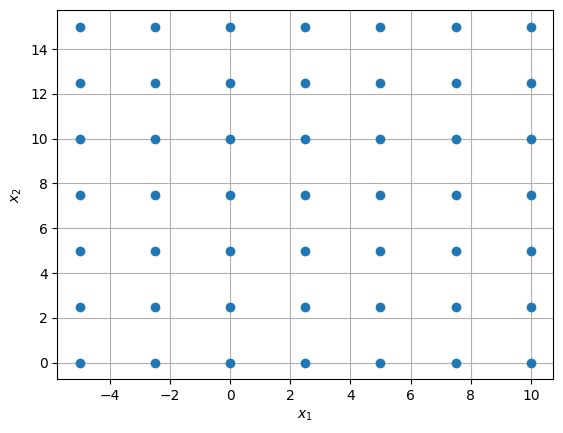

In [11]:
xlimits = np.array([[-5.0, 10.0], [0.0, 15.0]]) # limits for x and y
sampling = FullFactorial(xlimits=xlimits) # Instantiating the FullFactorial class

num = 49 # Number of samples to generate, each dimension will have 7 levels
x = sampling(num) # Generating DOE

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

As you can see, samples are generated in a grid-like fashion.

> __NOTE:__ Typically, the number of samples generated by full-factorial samples is a square number such as 4, 9, 16, 25, etc. However, it is not necessary to generate perfect square samples. For example, you can change `num` to 46 and you will see following result:

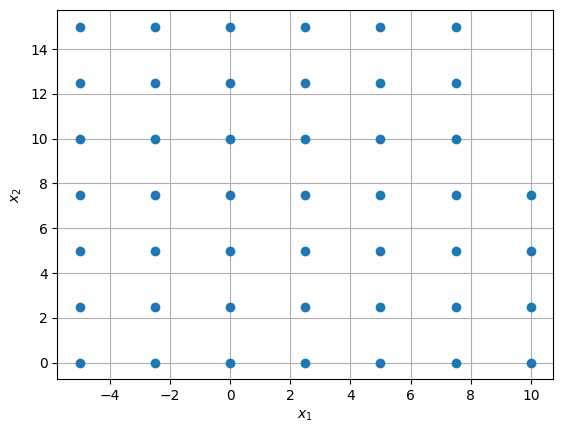

In [12]:
num = 46

x = sampling(num) # Generating DOE

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

Now, you can see that samples generated are not in a perfect grid-like fashion since `num` is not a square number.

## Latin Hypercube Sampling

Now, we will look into latin hypercube sampling. You can read about how to use `smt` for generating LH samples in the [documentation](https://smt.readthedocs.io/en/latest/_src_docs/sampling_methods/lhs.html). The process to generate samples is similar to what is described for full-factorial samples but with one additional step. You need to set criterion based on which samples are distributed in design space. Options of interest are:

1. `center` or `c` (default) - center of the strata
2. `maximin` or `m` - maximize the minimum distance between samples (based on heuristics, no optimization is performed)
3. `centermaximin` or `cm` - combination of `c` and `maximin`
5. `ese` - minimizing the $\phi_p$ metric (described below) using enhanced stochastic evolution algorithm

Goodness of a sampling plan can be measured using an extension of maximin distance criterion proposed by [Morris et al. (1995)](https://www.sciencedirect.com/science/article/pii/037837589400035T). For a sampling plan, all the pairwise distance between samples are calculated and sorted to get a distance list ($d_1$, $d_2$, ..., $d_s$) and  index list ($J_1$, $J_2$, ..., $J_s$), where $d_i$'s are distinct distance values with $d_1 < d_2 < \dots < d_s$, $J_i$'s are the number of pairs of samples with distance $d_i$. Then, maximin distance criterion by Morris et al. is calculated using the following formula:

$$  
    \phi_p = \Bigg [ \sum_{i=1}^{s} J_i d_i^{-p} \Bigg ]^{1/p}
$$

where, $p$ is a positive integer. Smaller the value of $\phi_p$, more space-filling the sampling plan.

Below block of code generates LH samples for *two* dimensional design space, plots it, and computes $\phi_p$ value. Read comments for more details.

phi_p value: 0.7900654411297857


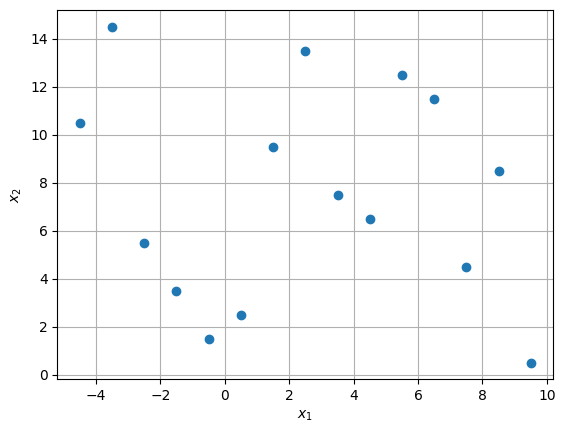

In [13]:
xlimits = np.array([[-5.0, 10.0], [0.0, 15.0]]) # limits for x and y
criterion = "c" # Sampling criterion
random_state = 1 # Fixing random state for reproducibility and comparison
sampling = LHS(xlimits=xlimits, criterion=criterion, random_state=random_state) # Instantiating the LHS class

num = 15 # Number of samples to generate, each dimension will be divided into 15 strata
x = sampling(num) # Generating DOE

phi_p = sampling._PhiP(x) # Calculating the phi_p value
print("phi_p value: {}".format(phi_p))

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

Here, the samples are distributed in a more random fashion as compared to full-factorial samples. $\phi_p$ for the sampling plan is 0.79. In the next block, criterion is set to `cm`:

phi_p value: 0.7094603158576284


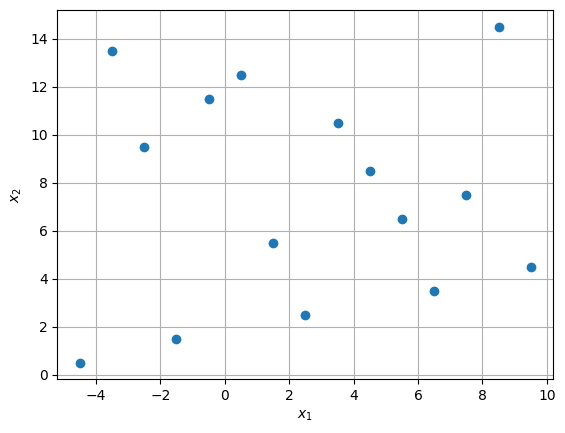

In [14]:
criterion = "cm" # Sampling criterion
random_state = 1 # Fixing random state for comparison
sampling = LHS(xlimits=xlimits, criterion=criterion, random_state=random_state) # Instantiating the LHS class

num = 15 # Number of samples to generate, each dimension will be divided into 15 strata
x = sampling(num) # Generating DOE

phi_p = sampling._PhiP(x) # Calculating the phi_p value
print("phi_p value: {}".format(phi_p))

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

Now, the samples are spread out more since `cm` criterion is using heuristics to maximize the minimum distance between samples. Accordingly, the $\phi_p$ value is reduced to 0.71. In the next block, criterion is set to `ese`:

phi_p value: 0.3453512854915221


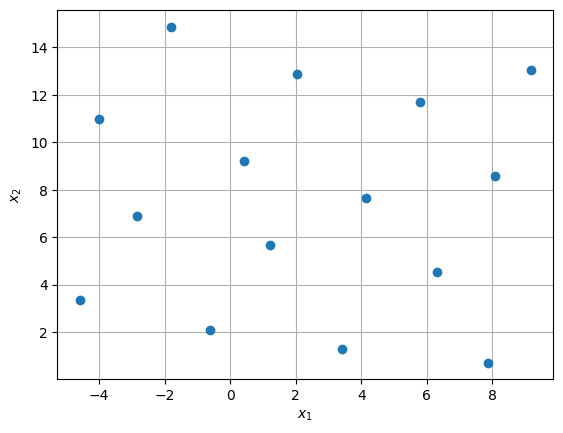

In [16]:
criterion = "ese" # Sampling criterion
random_state = 1 # Fixing random state for comparison
sampling = LHS(xlimits=xlimits, criterion=criterion, random_state=random_state) # Instantiating the LHS class

num = 15 # Number of samples to generate, each dimension will be divided into 15 strata
x = sampling(num) # Generating DOE

phi_p = sampling._PhiP(x) # Calculating the phi_p value
print("phi_p value: {}".format(phi_p))

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

Now, the samples are even more spread out as compared to `cm` criterion. The $\phi_p$ value is reduced to 0.35 from 0.71 for `cm` criterion which is a significant improvement. You can read more about how `ese` is used to minimize $\phi_p$ in this [paper](https://www.sciencedirect.com/science/article/pii/S0378375804001922).